In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

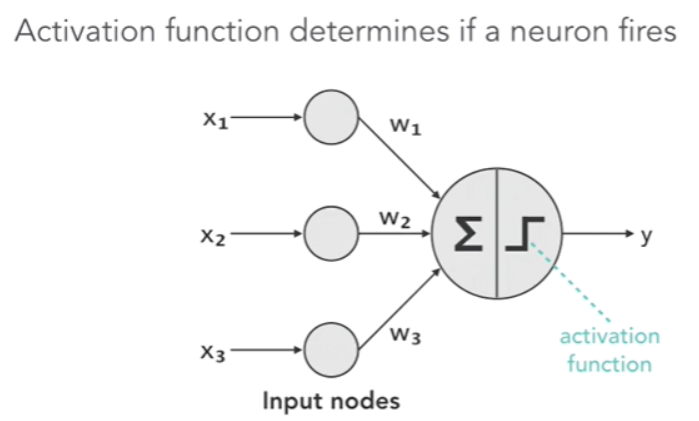

In [3]:
from IPython.display import Image
Image(filename='ActivationFunction.png')

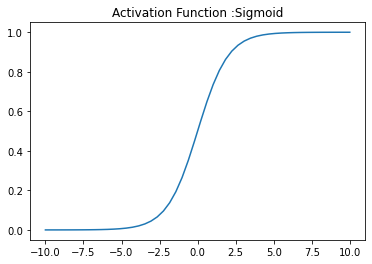

In [4]:
#Sigmoid Activation Function

def sigmoid(x):
    ''' It returns 1/(1+exp(-x)). where the values lies between zero and one '''

    return 1/(1+np.exp(-x))


x = np.linspace(-10, 10)
plt.plot(x, sigmoid(x))
plt.axis('tight')
plt.title('Activation Function :Sigmoid')
plt.show()

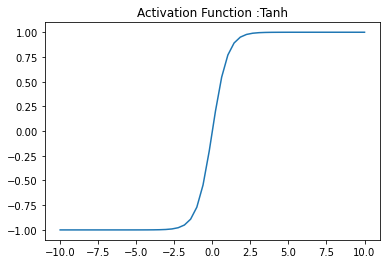

In [5]:
#Tanh Activation Function

def tanh(x):
    ''' It returns the value (1-exp(-2x))/(1+exp(-2x)) and '''
    '''the value returned will be lies in between -1 to 1.'''

    return np.tanh(x)

x = np.linspace(-10, 10)
plt.plot(x, tanh(x))
plt.axis('tight')
plt.title('Activation Function :Tanh')
plt.show()

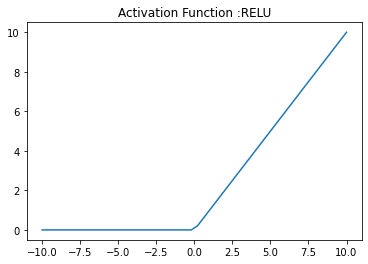

In [95]:
#RELU Activation Function
def RELU(x):
    ''' It returns zero if the input is less than zero otherwise it returns the given input. '''
    x1=[]
    for i in x:
        if i<0:
            x1.append(0)
        else:
            x1.append(i)
    return x1

x = np.linspace(-10, 10)
plt.plot(x, RELU(x))
plt.axis('tight')
plt.title('Activation Function :RELU')
plt.show()

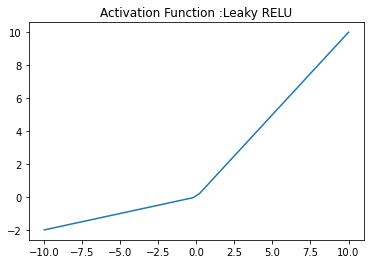

In [94]:
# Leaky RELU Activation Function
def LeakyRELU(x):
    ''' It returns alpha α times the input if the input is less than zero otherwise it returns the given input. '''
    '''This activation function also has an alpha α value, which is commonly between 0.1 to 0.3'''
    x1=[]
    for i in x:
        if i<0:
            x1.append(0.2*i)
        else:
            x1.append(i)
    return x1

x = np.linspace(-10, 10)
plt.plot(x, LeakyRELU(x))
plt.axis('tight')
plt.title('Activation Function :Leaky RELU')
plt.show()

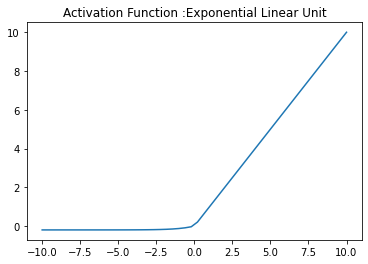

In [93]:
# Exponential Linear Unit Activation Function
def ExpRELU(x):
    ''' It returns alpha*(np.exp(i)-1) if the input is less than zero otherwise it returns the given input. '''
    '''For this activation function, an alpha α value is picked; a common value is between 0.1 and 0.3'''
    x1 = []
    alpha = 0.2
    for i in x:
        if i<0:
            x1.append(alpha*(np.exp(i)-1))
        else:
            x1.append(i)
    return x1

x = np.linspace(-10, 10)
plt.plot(x, ExpRELU(x))
plt.axis('tight')
plt.title('Activation Function :Exponential Linear Unit')
plt.show()

In [96]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU
from keras.layers.noise import AlphaDropout
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from keras.optimizers import Adam

In [97]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 3s 0us/step


In [98]:
def preprocess_mnist(x_train, y_train, x_test, y_test):
    # Normalizing all images of 28x28 pixels
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
    # Float values for division
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    
    # Normalizing the RGB codes by dividing it to the max RGB value
    x_train /= 255
    x_test /= 255
    
    # Categorical y values
    y_train = to_categorical(y_train)
    y_test= to_categorical(y_test)
    
    return x_train, y_train, x_test, y_test, input_shape
    
x_train, y_train, x_test, y_test, input_shape = preprocess_mnist(x_train, y_train, x_test, y_test)

In [99]:
def build_cnn(activation,
              dropout_rate,
              optimizer):
    model = Sequential()
    
    if(activation == 'selu'):
        model.add(Conv2D(32, kernel_size=(3, 3),
                  activation=activation,
                  input_shape=input_shape,
                  kernel_initializer='lecun_normal'))
        model.add(Conv2D(64, (3, 3), activation=activation, 
                         kernel_initializer='lecun_normal'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(AlphaDropout(0.25))
        model.add(Flatten())
        model.add(Dense(128, activation=activation, 
                        kernel_initializer='lecun_normal'))
        model.add(AlphaDropout(0.5))
        model.add(Dense(10, activation='softmax'))
    else:
        model.add(Conv2D(32, kernel_size=(3, 3),
                  activation=activation,
                  input_shape=input_shape))
        model.add(Conv2D(64, (3, 3), activation=activation))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(128, activation=activation))
        model.add(Dropout(0.5))
        model.add(Dense(10, activation='softmax'))
    
    model.compile(
        loss='binary_crossentropy', 
        optimizer=optimizer, 
        metrics=['accuracy']
    )
    
    return model

In [100]:
# Add the GELU function to Keras
def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))
get_custom_objects().update({'gelu': Activation(gelu)})

# Add leaky-relu so we can use it as a string
get_custom_objects().update({'leaky-relu': Activation(LeakyReLU(alpha=0.2))})

act_func = ['sigmoid', 'relu', 'elu', 'leaky-relu', 'selu', 'gelu']

In [ ]:
result = []

for activation in act_func:
    print('\nTraining with -->{0}<-- activation function\n'.format(activation))
    
    model = build_cnn(activation=activation,
                      dropout_rate=0.2,
                      optimizer=Adam(clipvalue=0.5))
    
    history = model.fit(x_train, y_train,
          validation_split=0.20,
          batch_size=128, # 128 is faster, but less accurate. 16/32 recommended
          epochs=30,
          verbose=1,
          validation_data=(x_test, y_test))
    
    result.append(history)
    
    K.clear_session()
    del model

print(result)